In [29]:
from utils import *

In [30]:
BASE_URL = "https://s3.eu-west-3.amazonaws.com/profession.ai/datasets/"
df = pd.read_csv(BASE_URL+"Filter_Toxic_Comments_dataset.csv")
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


## EDA

In [31]:
data_eda = df.drop(columns=['sum_injurious'])
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
distribution = data_eda[categories].sum().sort_values()

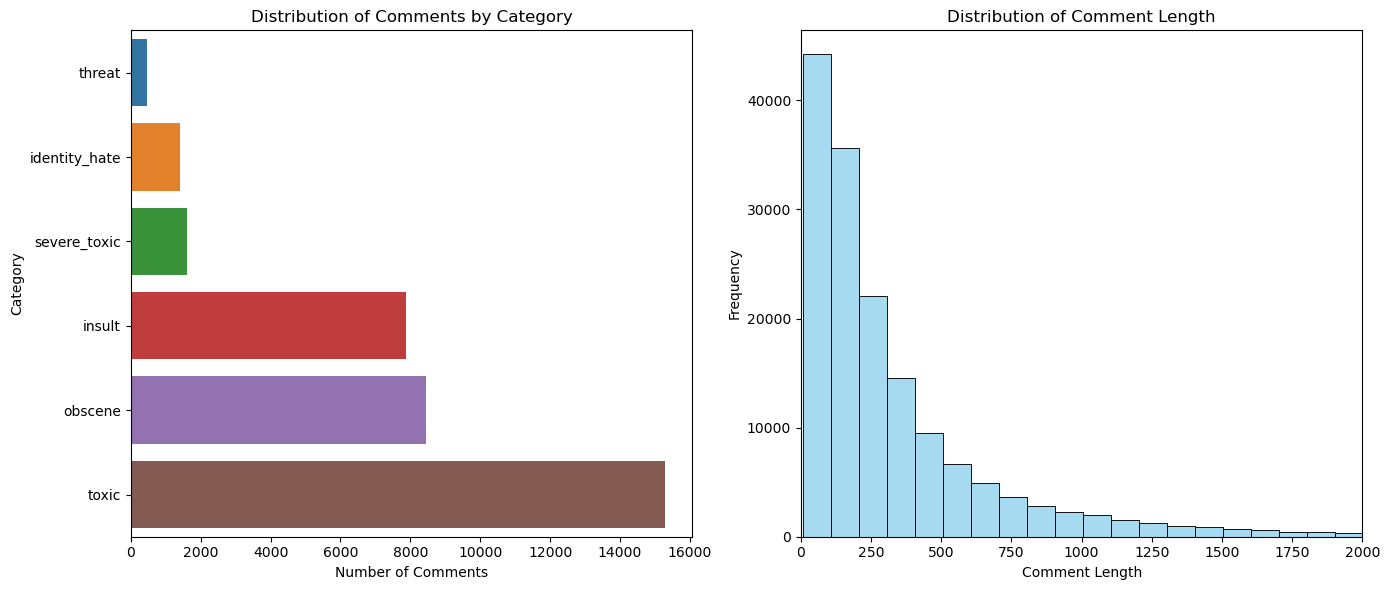

In [32]:
plot_comment_statistics(data_eda, distribution)

The distribution of comments by category shows that most comments are classified as non-harmful in all categories. However, the toxic category has the highest number of occurrences, followed by obscene and insult. The severe_toxic, threat and identity_hate categories have significantly fewer comments.

The distribution of comment length indicates that most comments are less than 500 characters long, with a very clear peak for short comments. However, there are also comments exceeding 1,000 characters, although they are in the minority.

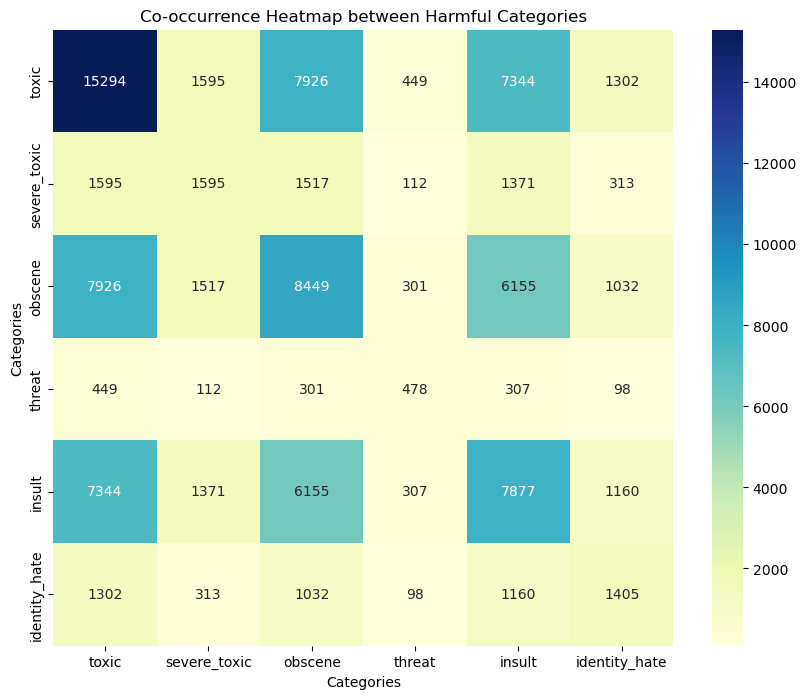

In [33]:
plot_co_occurrence_heatmap(data_eda, categories)

The category 'toxic' has the highest co-occurrence with 'obscene' and 'insult', which suggests that comments that are 'toxic' are often also 'obscene' and 'insulting'. This can imply a strong correlation between these categories in the nature of the toxicity.

Severe toxicity most commonly co-occurs with 'toxic' and 'obscene'. This might indicate that severely toxic comments are often explicitly abusive.

'Threat' has a notably lower co-occurrence with all categories. This could mean that threats are less common or that they are often not tagged alongside other forms of toxicity, potentially due to their unique nature or lower frequency.

'Identity_hate' shows a moderate co-occurrence with 'toxic', and to a lesser extent with 'insult', suggesting that identity-based hate speech often falls under general toxicity and can be insulting.

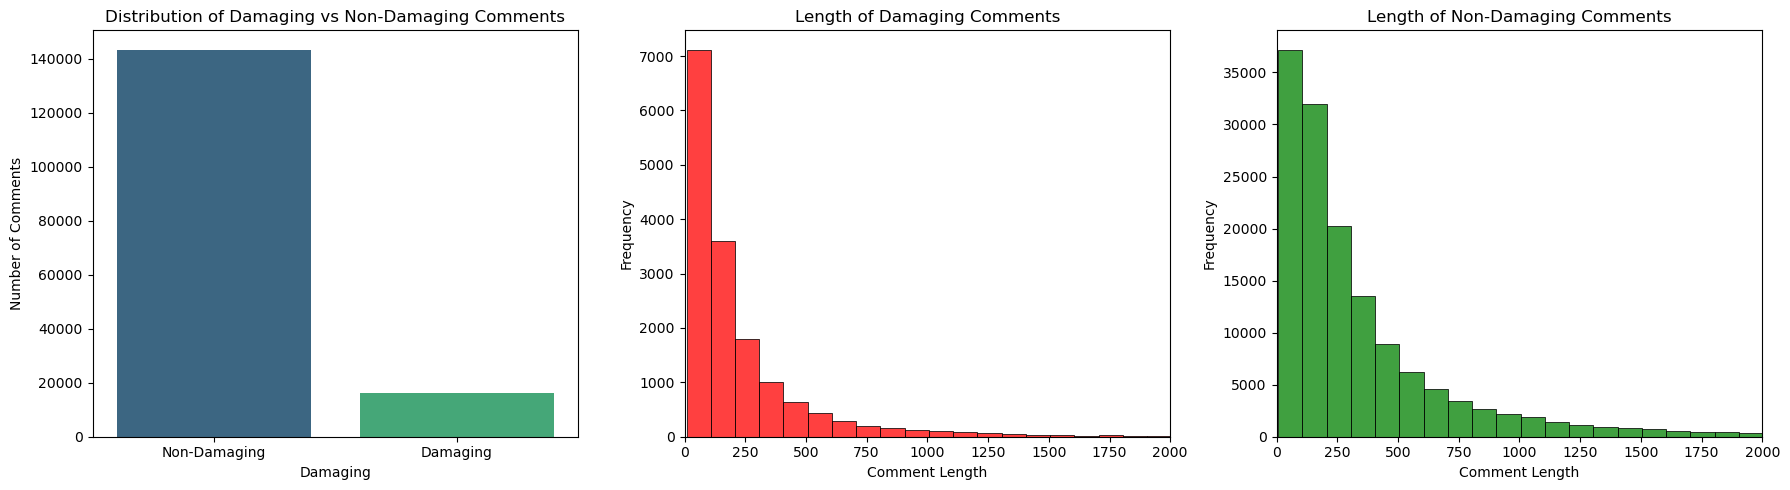

,comment_length,is_damaging
comment_length,1.000000,-0.051696
is_damaging,-0.051696,1.000000


In [34]:
plot_damaging_comment_stats(data_eda, categories)

The distribution between harmful and non-harmful comments shows a significant predominance of comments classified as non-harmful. This indicates that the dataset is unbalanced.

Analysing the length of the comments, it can be seen that both harmful and non-harmful comments tend to be concentrated in the shorter length ranges, with most comments under 500 characters. 

The correlation between comment length and comment harmfulness is slightly negative (-0.051696), suggesting that there is no strong relationship between comment length and the likelihood of it being harmful. This could indicate that the length of the comment alone is not a reliable indicator of its harmfulness.

In [35]:
calculate_correlation_with_categories(data_eda, categories)

,comment_length
toxic,-0.054470
severe_toxic,0.010131
obscene,-0.042945
threat,-0.008011
insult,-0.045052
identity_hate,-0.013647


Comment length has a slight negative correlation with the categories toxic (-0.054470), obscene (-0.042945), and insult (-0.045052). This suggests that, for these categories, slightly shorter comments tend to be classified as harmful, although the correlation is very weak and probably not significant in practical terms.

For the categories severe_toxic (0.010131), threat (-0.008011), and identity_hate (-0.013647), the correlation is even weaker indicating that there is almost no direct relationship between the length of the comment and its classification in these specific categories of harmfulness.

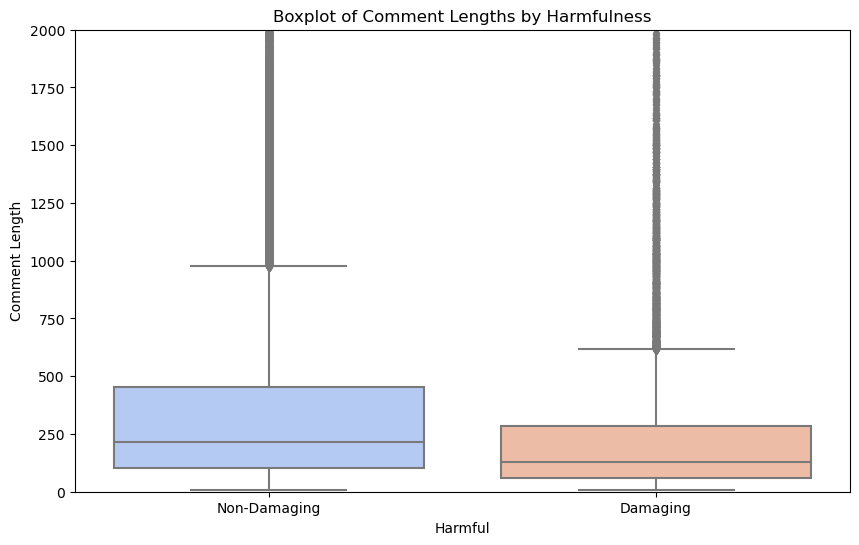

In [36]:
plot_comment_length_outliers(data_eda)

In [37]:
calculate_comment_length_statistics(data_eda)

,Metric,Damaging,Non-Damaging
0,Count,16225.000000,143346.000000
1,Mean,303.304037,404.347174
2,Std,619.402896,586.503447
3,Min,8.000000,6.000000
4,25%,61.000000,102.000000
5,50%,128.000000,216.000000
6,75%,283.000000,452.000000
7,Max,5000.000000,5000.000000
8,IQR,222.000000,350.000000
9,Outlier Limit,616.000000,977.000000


In [38]:
calculate_outliers_ratio(data_eda)

{'Ratio of Outliers (Damaging)': 0.09750385208012327,
 'Ratio of Outliers (Non-Damaging)': 0.09052223291895135}

The average length of non-harmful comments is slightly longer than that of harmful comments. However, both categories show a high standard deviation, indicating great variety in the length of comments.

The median shows that half of the harmful comments have a length of less than 128 characters, while for the non-harmful comments this threshold rises to 216 characters, confirming that the non-harmful comments tend to be slightly longer.

IQRs indicate that the central distribution of the data (25th to 75th percentile) is wider for non-harmful comments, suggesting greater variability in comment lengths than for harmful comments.

The ratio between the number of outliers and the total number of comments is 9.75% for harmful comments and 9.05% for non-harmful comments. 
These results show that, proportionally, the presence of outliers in the length of comments is similar between the two categories, with a slight difference in favour of the damaging comments.

### EDA conclusions
The dataset presents a significant skew towards comments classified as non-harmful, with the toxic category emerging as the most frequent of the harmful categories, followed by obscene and insult. The categories severe_toxic, threat, and identity_hate are less represented, indicating an important variation in the frequency of the different types of harmfulness.

The imbalance of the dataset is clear, both in terms of the overall prevalence of non-harmful comments over harmful comments and in the unequal representation of the different categories of harmfulness within the messages classified as harmful.

Most comments are less than 500 characters long, with a similar distribution between harmful and non-harmful comments. However, outliers exist in both categories, indicating the presence of extremely long comments.

There is no strong correlation between comment length and its classification as harmful or non-harmful, nor with the specific categories of harmfulness. This suggests that comment length alone is not a reliable indicator of its harmful nature.

Co-occurrence analysis revealed that some categories of harmfulness tend to occur together in comments more frequently than others, suggesting patterns of harmful behaviour involving multiple forms of abuse simultaneously.

# Data preprocessing

In [39]:
data=df.copy()

data['cleaned_comment_text'] = data['comment_text'].apply(preprocess_text)


data[['comment_text', 'cleaned_comment_text']].head()

,comment_text,cleaned_comment_text
0,Explanation\nWhy the edits made under my usern...,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,daww match background colour im seemingly stuc...
2,"Hey man, I'm really not trying to edit war. It...",hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",cant make real suggestion improvement wondered...
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page thats


In [40]:
remove_empty_or_space_only_rows(data)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious,cleaned_comment_text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,daww match background colour im seemingly stuc...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,cant make real suggestion improvement wondered...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,sir hero chance remember page thats
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,second time asking view completely contradicts...
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,ashamed horrible thing put talk page
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,spitzer umm there actual article prostitution ...
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,look like actually put speedy first version de...


In [41]:
f1_scores_collection = {}

# Logistic regression model: optimization and evaluation

In [42]:
X = data[['cleaned_comment_text', 'sum_injurious']]  
y = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
class_weights = calculate_class_weights(y_train)

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(max_features=10000), 'cleaned_comment_text'),
        ('pass', 'passthrough', ['sum_injurious'])
    ]
)

In [45]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(LogisticRegression(max_iter=500, random_state=42)))
])


param_grid = {
    'classifier__estimator__solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'classifier__estimator__class_weight': [None, 'balanced', class_weights]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_micro', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best F1 score (micro) with LogReg:", grid_search.best_score_)
print("Best params with LogReg:", grid_search.best_params_)

Best F1 score (micro) with LogReg: 0.926118688620281
Best params with LogReg: {'classifier__estimator__class_weight': None, 'classifier__estimator__solver': 'newton-cg'}


In [46]:
y_test_pred, f1_scores_collection = predict_and_save_f1_scores(grid_search.best_estimator_,X_test,y_test,"LogReg",f1_scores_collection)

Classification Report on the test set:
               precision    recall  f1-score   support

        toxic       0.94      1.00      0.97      3056
 severe_toxic       0.84      0.68      0.75       321
      obscene       0.96      0.93      0.94      1715
       threat       0.79      0.31      0.45        74
       insult       0.93      0.90      0.92      1614
identity_hate       0.91      0.55      0.69       294

    micro avg       0.94      0.92      0.93      7074
    macro avg       0.90      0.73      0.79      7074
 weighted avg       0.94      0.92      0.92      7074
  samples avg       0.09      0.09      0.09      7074

Hamming Loss: 0.005211760405243094


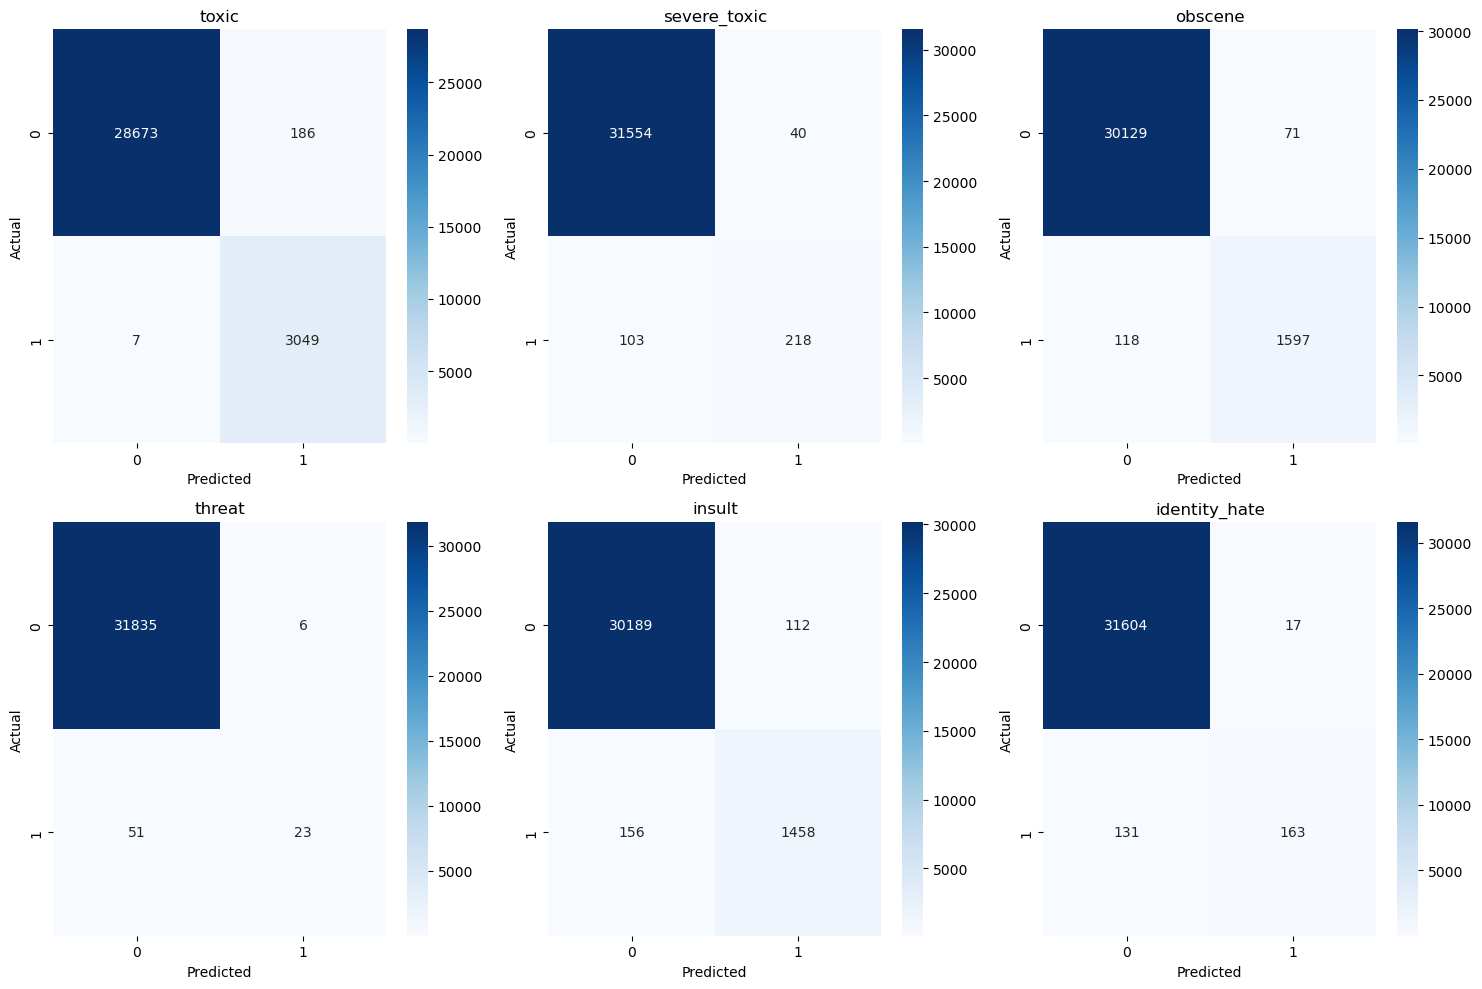

In [47]:
evaluate_model_performance(y_test,y_test_pred)

# Naive Bayes model: optimization and evaluation

In [48]:
pipeline_nb = Pipeline([
    ('preprocessor', preprocessor),  
    ('classifier', MultiOutputClassifier(MultinomialNB()))
])

param_grid_nb = {
    'classifier__estimator__alpha': [0.01, 0.1, 1.0] 
}

grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=3, scoring='f1_micro', n_jobs=-1)

grid_search_nb.fit(X_train, y_train)

print("Best F1 score (micro) with Naive Bayes:", grid_search_nb.best_score_)
print("Best parameters with Naive Bayes:", grid_search_nb.best_params_)

Best F1 score (micro) with Naive Bayes: 0.8108078645891373
Best parameters with Naive Bayes: {'classifier__estimator__alpha': 1.0}


In [49]:
y_test_pred_nb, f1_scores_collection = predict_and_save_f1_scores(grid_search_nb.best_estimator_,X_test,y_test,"NB",f1_scores_collection)

Classification Report on the test set:
               precision    recall  f1-score   support

        toxic       0.94      0.96      0.95      3056
 severe_toxic       0.29      0.96      0.44       321
      obscene       0.71      0.96      0.81      1715
       threat       0.23      0.07      0.10        74
       insult       0.67      0.95      0.79      1614
identity_hate       0.26      0.73      0.38       294

    micro avg       0.69      0.94      0.80      7074
    macro avg       0.52      0.77      0.58      7074
 weighted avg       0.76      0.94      0.83      7074
  samples avg       0.07      0.09      0.08      7074

Hamming Loss: 0.017818162828346126


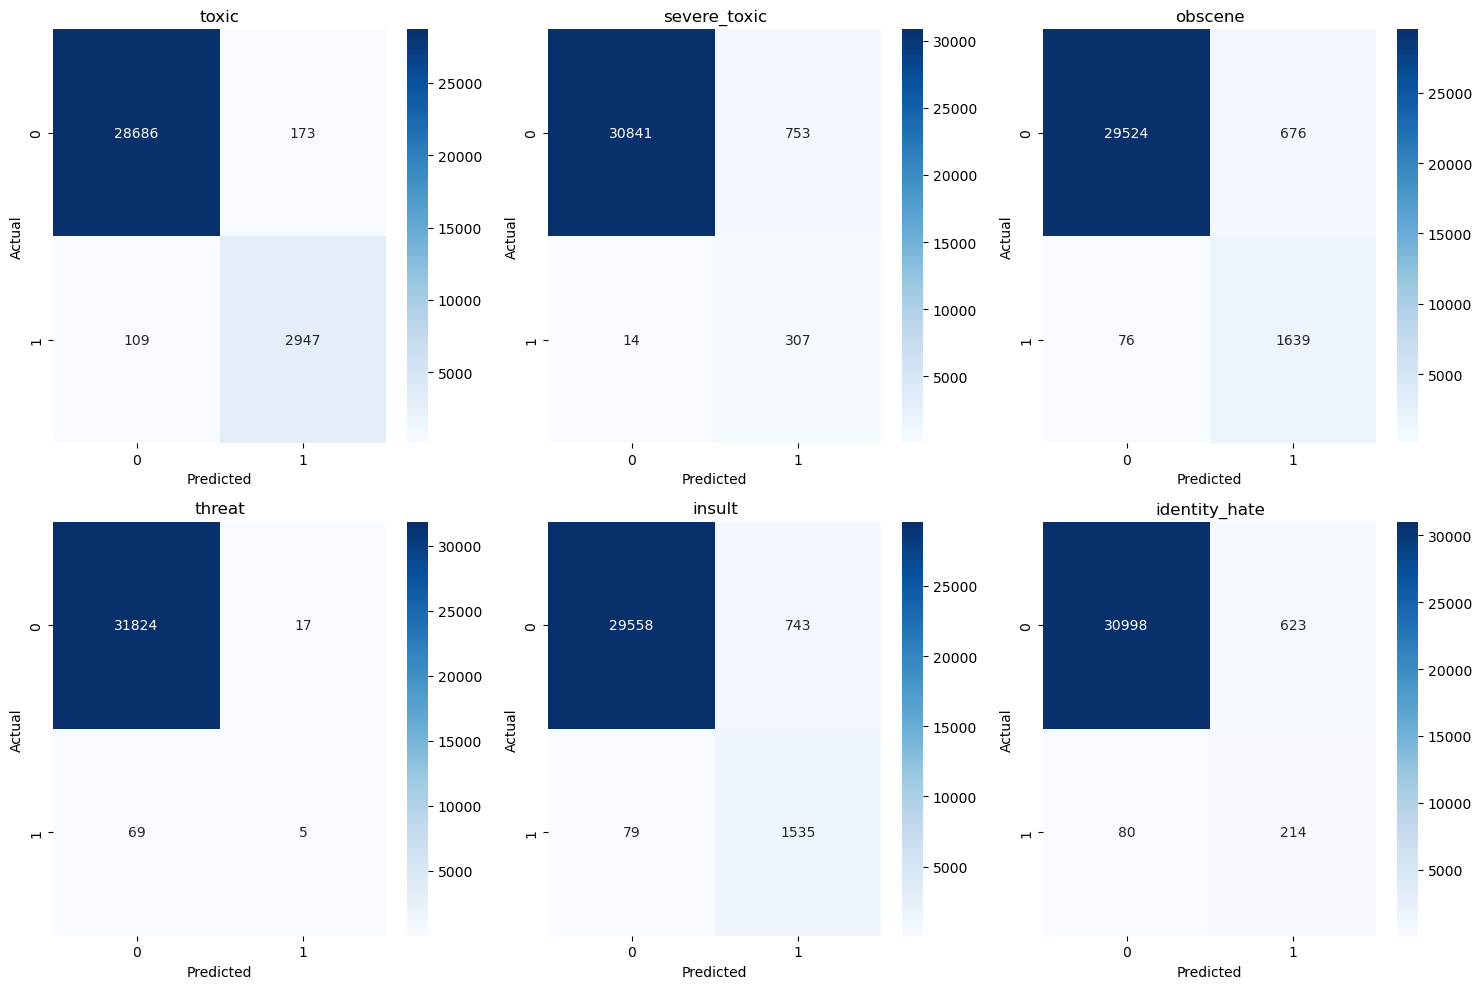

In [50]:
evaluate_model_performance(y_test,y_test_pred_nb)

In [51]:
pipeline_nb = Pipeline([
    ('preprocessor', preprocessor),  
    ('classifier', MultiOutputClassifier(MultinomialNB()))
])

param_grid_nb = {
    'classifier__estimator__alpha': [0.01, 0.1, 1.0] 
}

grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=3, scoring='f1_micro', n_jobs=-1)

grid_search_nb.fit(X_train, y_train)

print("Best F1 score (micro) with Naive Bayes:", grid_search_nb.best_score_)
print("Best parameters with Naive Bayes:", grid_search_nb.best_params_)

Best F1 score (micro) with Naive Bayes: 0.8108078645891373
Best parameters with Naive Bayes: {'classifier__estimator__alpha': 1.0}


In [52]:
y_test_pred_nb, f1_scores_collection = predict_and_save_f1_scores(grid_search_nb.best_estimator_,X_test,y_test,"NB",f1_scores_collection)

Classification Report on the test set:
               precision    recall  f1-score   support

        toxic       0.94      0.96      0.95      3056
 severe_toxic       0.29      0.96      0.44       321
      obscene       0.71      0.96      0.81      1715
       threat       0.23      0.07      0.10        74
       insult       0.67      0.95      0.79      1614
identity_hate       0.26      0.73      0.38       294

    micro avg       0.69      0.94      0.80      7074
    macro avg       0.52      0.77      0.58      7074
 weighted avg       0.76      0.94      0.83      7074
  samples avg       0.07      0.09      0.08      7074

Hamming Loss: 0.017818162828346126


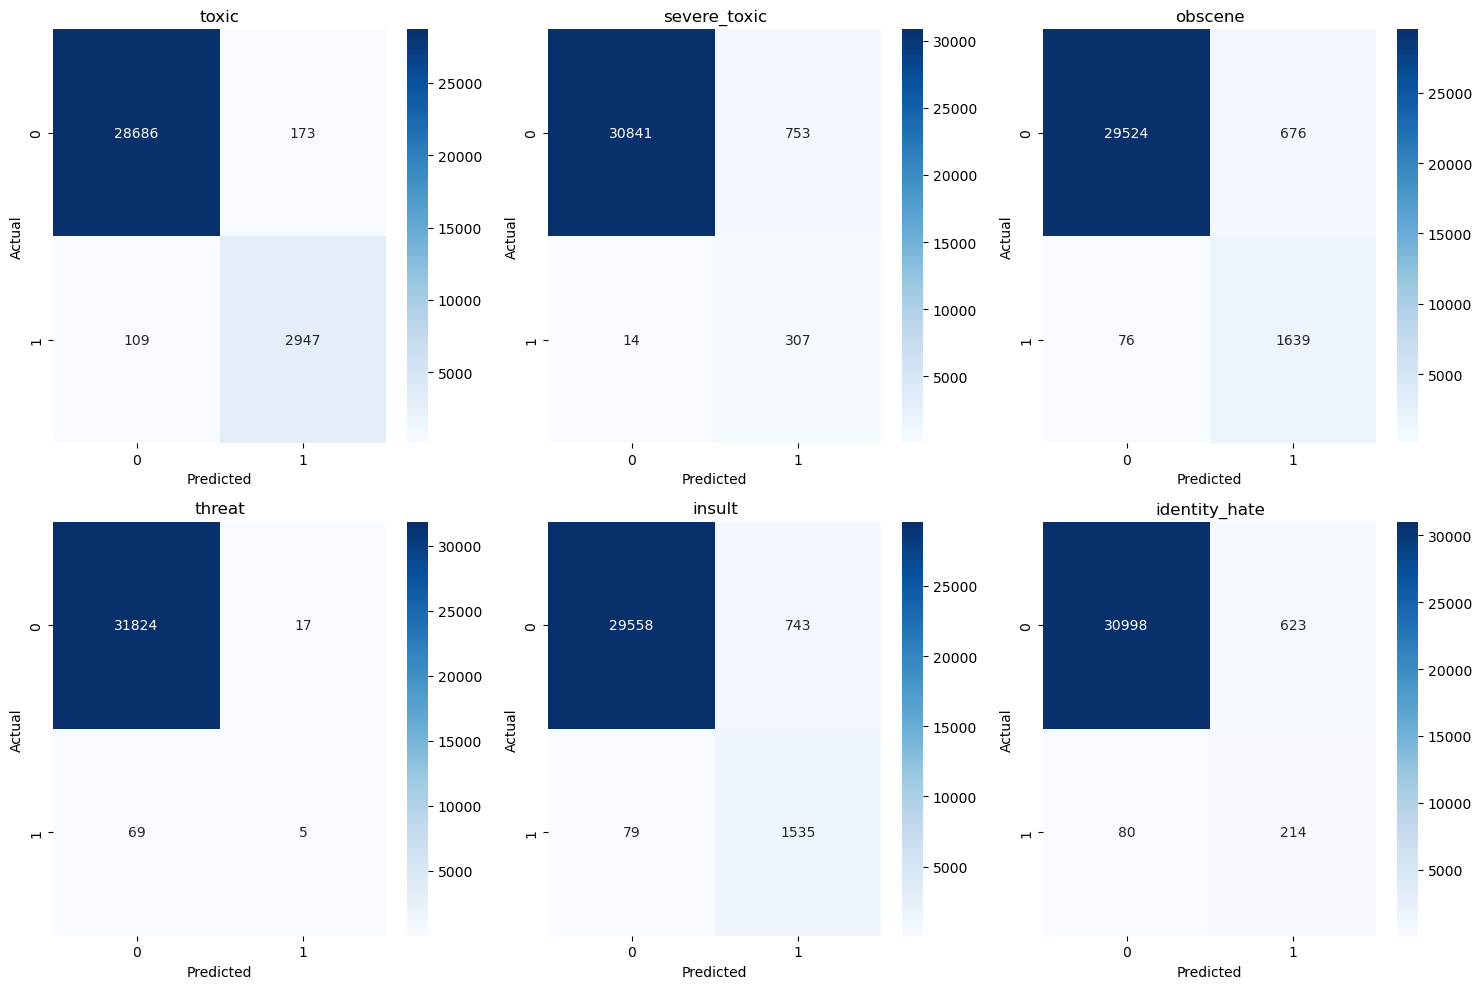

In [53]:
evaluate_model_performance(y_test,y_test_pred_nb)

# Bi-LSTM training with class weights

In [54]:
early_stopper = EarlyStopping(monitor='val_f1_score', min_delta=0.01, patience=3, verbose=1, mode='max', restore_best_weights=True)

In [55]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(data)

In [56]:
model1, comment_vectorizer = create_model()
comment_vectorizer.adapt(data['cleaned_comment_text'].to_numpy())
model1.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 100)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 100, 128)          1280128   
                                                                 
 bidirectional (Bidirection  (None, 48)                29376     
 al)                                                             
                                                                 
 dense (Dense)               (None, 20)                980       
                                                                 
 dense_1 (Dense)             (None, 6)                 126 

In [57]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16).prefetch(tf.data.AUTOTUNE)

In [58]:
history = model1.fit(
    train_dataset,
    epochs=40,
    validation_data=val_dataset,
    validation_steps=int(0.5 * len(val_dataset)),
    callbacks=[early_stopper],
    class_weight= class_weights,
    batch_size=16   
)

Epoch 1/40
9001/9001 [==============================] - 173s 19ms/step - loss: 0.1247 - precision: 0.7912 - recall: 0.5887 - f1_score: 0.6751 - auc: 0.9497 - val_loss: 0.0486 - val_precision: 0.8639 - val_recall: 0.6229 - val_f1_score: 0.7239 - val_auc: 0.9716
Epoch 2/40
9001/9001 [==============================] - 173s 19ms/step - loss: 0.0937 - precision: 0.8287 - recall: 0.6750 - f1_score: 0.7440 - auc: 0.9754 - val_loss: 0.0476 - val_precision: 0.8083 - val_recall: 0.6927 - val_f1_score: 0.7460 - val_auc: 0.9700
Epoch 3/40
9001/9001 [==============================] - 172s 19ms/step - loss: 0.0793 - precision: 0.8394 - recall: 0.7250 - f1_score: 0.7780 - auc: 0.9832 - val_loss: 0.0507 - val_precision: 0.8093 - val_recall: 0.6572 - val_f1_score: 0.7254 - val_auc: 0.9528
Epoch 4/40
9001/9001 [==============================] - 172s 19ms/step - loss: 0.0670 - precision: 0.8498 - recall: 0.7669 - f1_score: 0.8062 - auc: 0.9862 - val_loss: 0.0548 - val_precision: 0.7786 - val_recall: 0.64

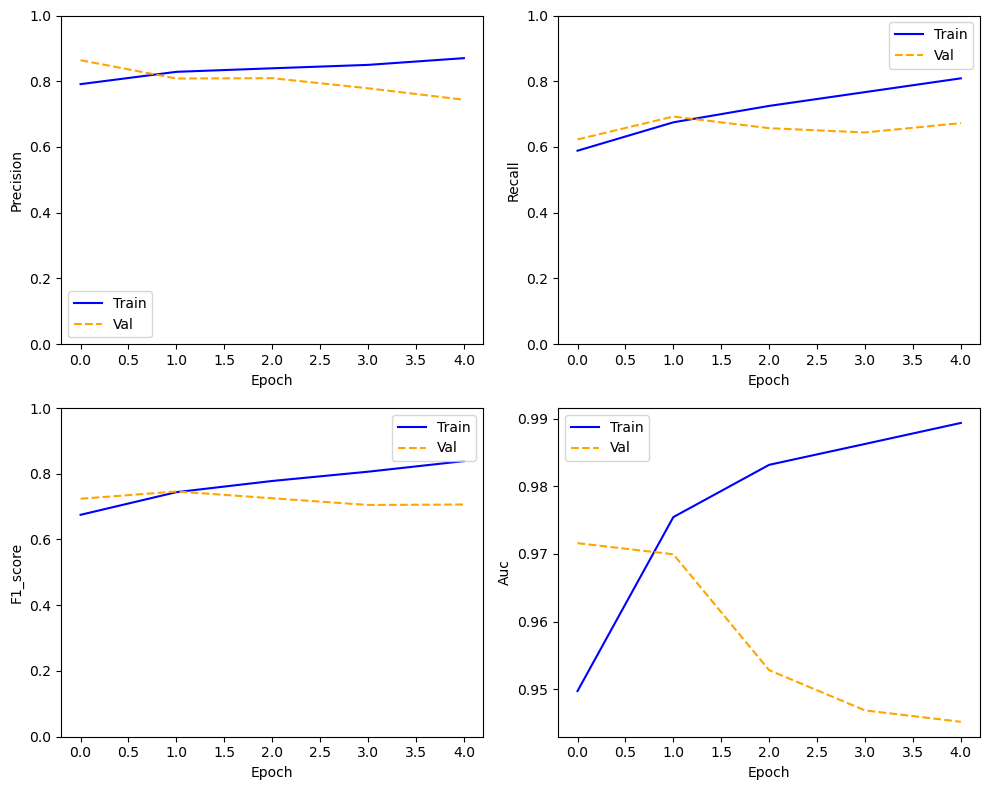

In [59]:
plot_custom_metrics(history)

499/499 [==============================] - 3s 4ms/step
Classification Report on the test set:
               precision    recall  f1-score   support

        toxic       0.81      0.77      0.79       748
 severe_toxic       0.56      0.25      0.34        80
      obscene       0.76      0.87      0.81       421
       threat       0.00      0.00      0.00        13
       insult       0.71      0.75      0.73       410
identity_hate       0.64      0.52      0.57        71

    micro avg       0.76      0.75      0.75      1743
    macro avg       0.58      0.53      0.54      1743
 weighted avg       0.75      0.75      0.75      1743
  samples avg       0.06      0.07      0.06      1743

Hamming Loss: 0.01773405188620128


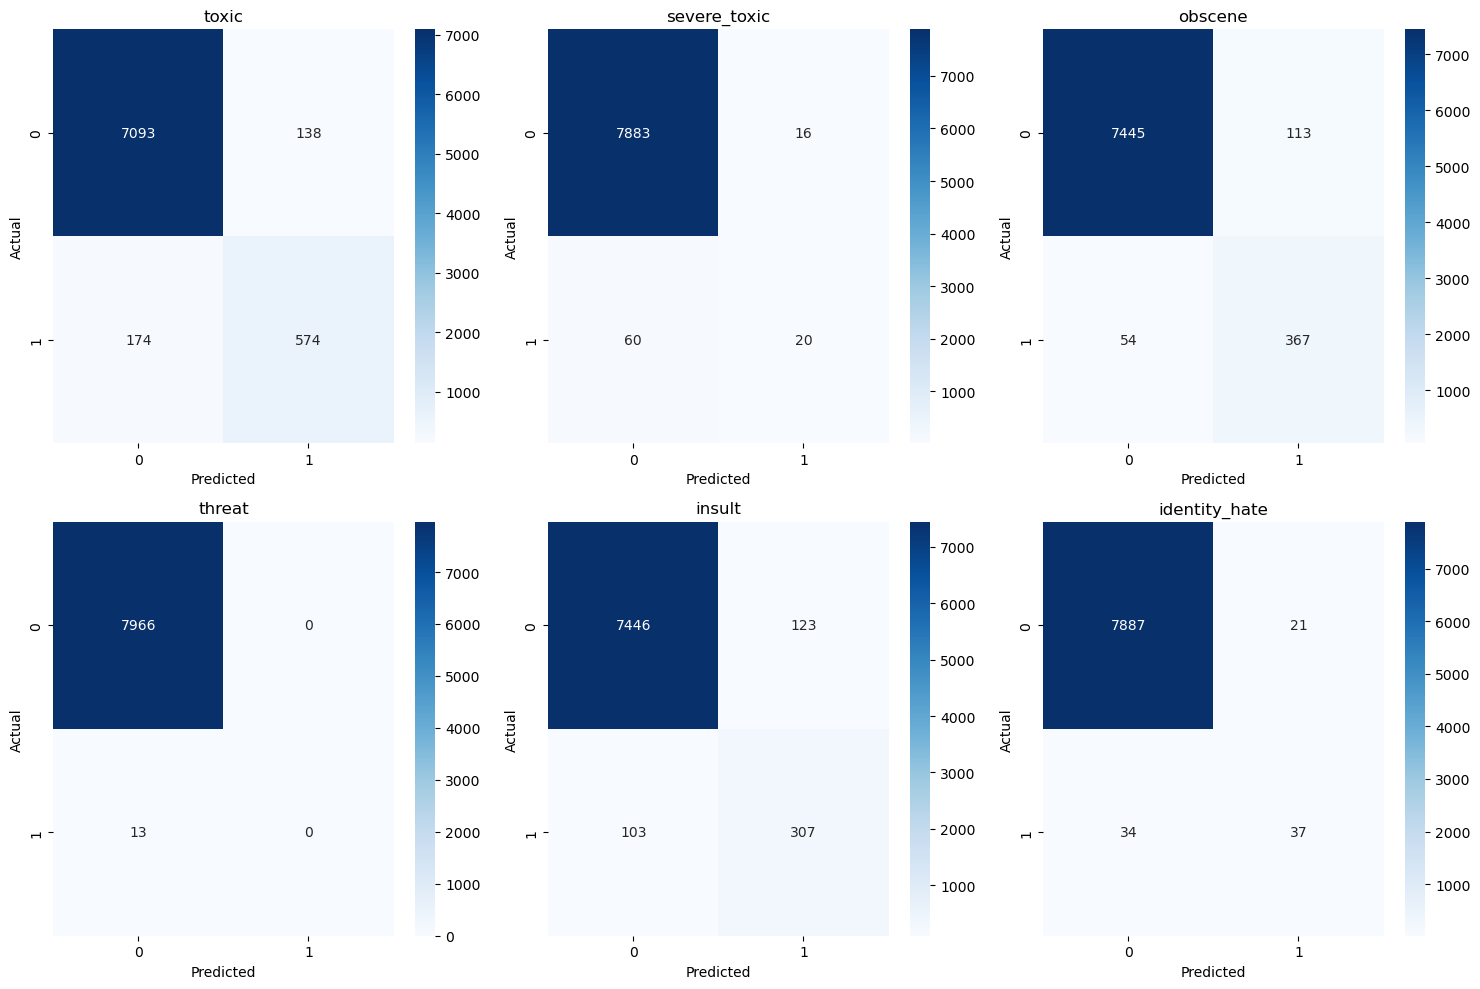

In [60]:
y_pred = predict_with_threshold(model1, test_dataset)
evaluate_model_performance(y_test,y_pred)
update_f1_scores(y_test,y_pred,"rnn1",f1_scores_collection)

# Enhanced Bi-LSTM with Class Weights

In [61]:
model2 = create_second_model(comment_vectorizer)
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_text (InputLayer)     [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 100)               0         
 ctorization)                                                    
                                                                 
 text_embedding_layer (Embe  (None, 100, 128)          1280128   
 dding)                                                          
                                                                 
 bi_lstm_layer (Bidirection  (None, 48)                29376     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                            

In [62]:
history2 = model2.fit(
    train_dataset,
    epochs=40,
    validation_data=val_dataset,
    validation_steps=int(0.5 * len(val_dataset)),
    class_weight= class_weights,
    batch_size=16,
    callbacks=[early_stopper]
)

Epoch 1/40
9001/9001 [==============================] - 170s 19ms/step - loss: 0.2025 - precision: 0.4612 - recall: 0.3268 - f1_score: 0.3825 - auc: 0.8871 - val_loss: 0.0730 - val_precision: 0.6838 - val_recall: 0.5189 - val_f1_score: 0.5901 - val_auc: 0.9591
Epoch 2/40
9001/9001 [==============================] - 167s 19ms/step - loss: 0.1405 - precision: 0.7812 - recall: 0.4514 - f1_score: 0.5722 - auc: 0.9423 - val_loss: 0.0720 - val_precision: 0.7305 - val_recall: 0.5319 - val_f1_score: 0.6156 - val_auc: 0.9670
Epoch 3/40
9001/9001 [==============================] - 167s 19ms/step - loss: 0.1312 - precision: 0.8003 - recall: 0.4914 - f1_score: 0.6089 - auc: 0.9506 - val_loss: 0.0651 - val_precision: 0.7165 - val_recall: 0.5887 - val_f1_score: 0.6463 - val_auc: 0.9601
Epoch 4/40
9001/9001 [==============================] - 167s 19ms/step - loss: 0.1272 - precision: 0.8020 - recall: 0.5070 - f1_score: 0.6213 - auc: 0.9524 - val_loss: 0.0667 - val_precision: 0.7621 - val_recall: 0.55

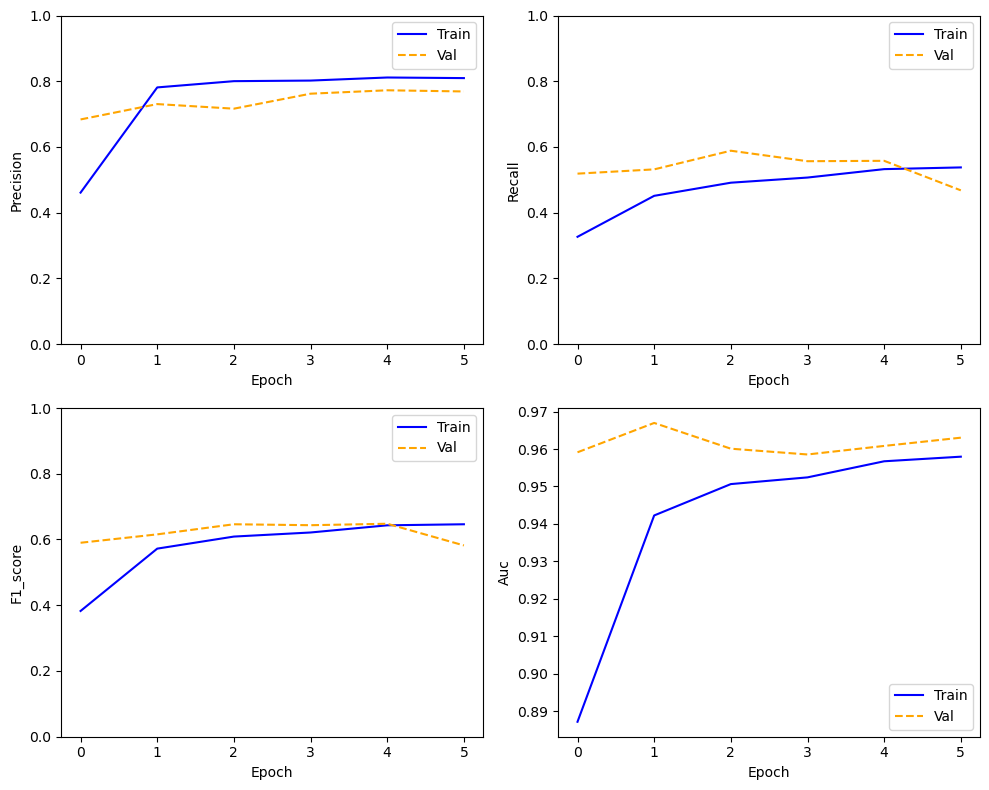

In [63]:
plot_custom_metrics(history2)

499/499 [==============================] - 3s 4ms/step
Classification Report on the test set:
               precision    recall  f1-score   support

        toxic       0.84      0.67      0.75       748
 severe_toxic       0.29      0.75      0.42        80
      obscene       0.79      0.80      0.79       421
       threat       0.00      0.00      0.00        13
       insult       0.70      0.70      0.70       410
identity_hate       0.14      0.28      0.19        71

    micro avg       0.67      0.69      0.68      1743
    macro avg       0.46      0.53      0.47      1743
 weighted avg       0.74      0.69      0.70      1743
  samples avg       0.05      0.06      0.05      1743

Hamming Loss: 0.02349918536157413


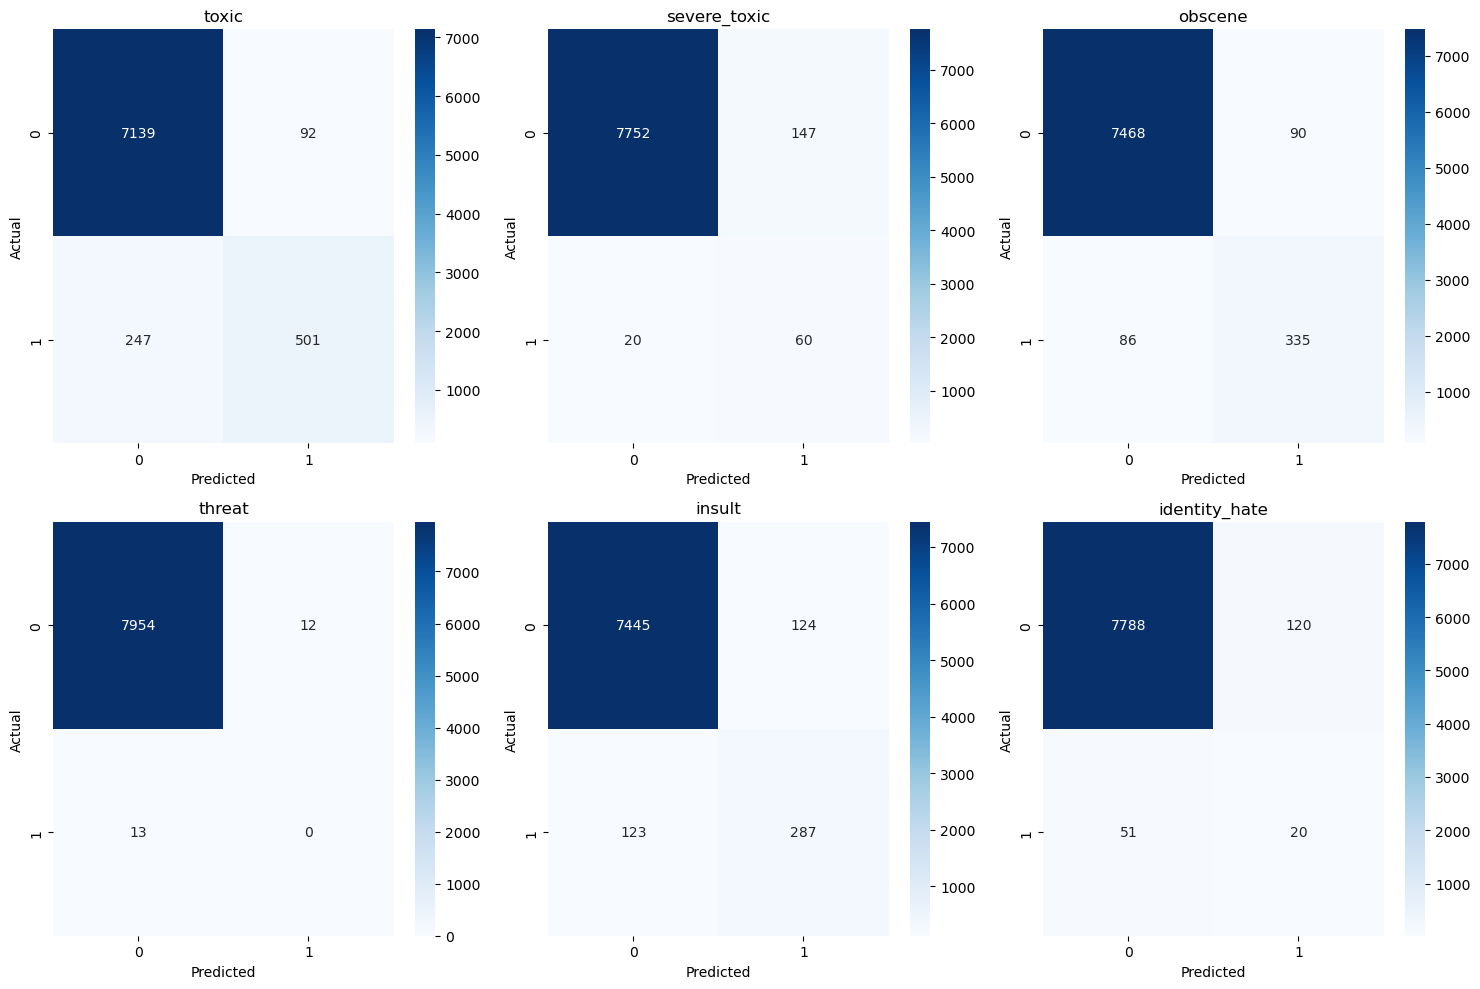

In [64]:
y_pred2 = predict_with_threshold(model2,test_dataset)
evaluate_model_performance(y_test,y_pred2)
update_f1_scores(y_test,y_pred2,'rnn2', f1_scores_collection)

# Text-Numeric input Bi-LSTM

In [65]:
X_train, X_val, X_test, y_train, y_val, y_test, sum_injurious_train, sum_injurious_val, sum_injurious_test= prepare_data_numerical_input(data)

In [66]:
train_dataset_num = tf.data.Dataset.from_tensor_slices(((X_train, sum_injurious_train), y_train)).shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE)
val_dataset_num = tf.data.Dataset.from_tensor_slices(((X_val, sum_injurious_val), y_val)).batch(16).prefetch(tf.data.AUTOTUNE)
test_dataset_num = tf.data.Dataset.from_tensor_slices(((X_test, sum_injurious_test), y_test)).batch(16).prefetch(tf.data.AUTOTUNE)

In [67]:
model3 = create_model_with_numerical_input(comment_vectorizer)
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_text (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 text_vectorization (TextVe  (None, 100)                  0         ['input_text[0][0]']          
 ctorization)                                                                                     
                                                                                                  
 embedding_1 (Embedding)     (None, 100, 128)             1280128   ['text_vectorization[2][0]']  
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 48)                   29376     ['embedding_1[0][0]']   

In [68]:
history3 = model3.fit(
    train_dataset_num,
    epochs=40,
    validation_data=val_dataset_num,
    validation_steps=int(0.5 * len(val_dataset_num)),
    callbacks=[early_stopper],
    batch_size=16,
    class_weight=class_weights 
)

Epoch 1/40
9001/9001 [==============================] - 179s 20ms/step - loss: 0.0667 - precision: 0.8909 - recall: 0.8252 - f1_score: 0.8568 - auc: 0.9875 - val_loss: 0.0188 - val_precision: 0.9260 - val_recall: 0.9019 - val_f1_score: 0.9138 - val_auc: 0.9912
Epoch 2/40
9001/9001 [==============================] - 182s 20ms/step - loss: 0.0431 - precision: 0.9262 - recall: 0.9022 - f1_score: 0.9140 - auc: 0.9933 - val_loss: 0.0172 - val_precision: 0.9059 - val_recall: 0.9220 - val_f1_score: 0.9139 - val_auc: 0.9948
Epoch 3/40
9001/9001 [==============================] - 176s 20ms/step - loss: 0.0306 - precision: 0.9376 - recall: 0.9306 - f1_score: 0.9341 - auc: 0.9951 - val_loss: 0.0175 - val_precision: 0.9129 - val_recall: 0.9043 - val_f1_score: 0.9086 - val_auc: 0.9924
Epoch 4/40
9001/9001 [==============================] - 171s 19ms/step - loss: 0.0220 - precision: 0.9542 - recall: 0.9498 - f1_score: 0.9520 - auc: 0.9948 - val_loss: 0.0199 - val_precision: 0.9067 - val_recall: 0.89

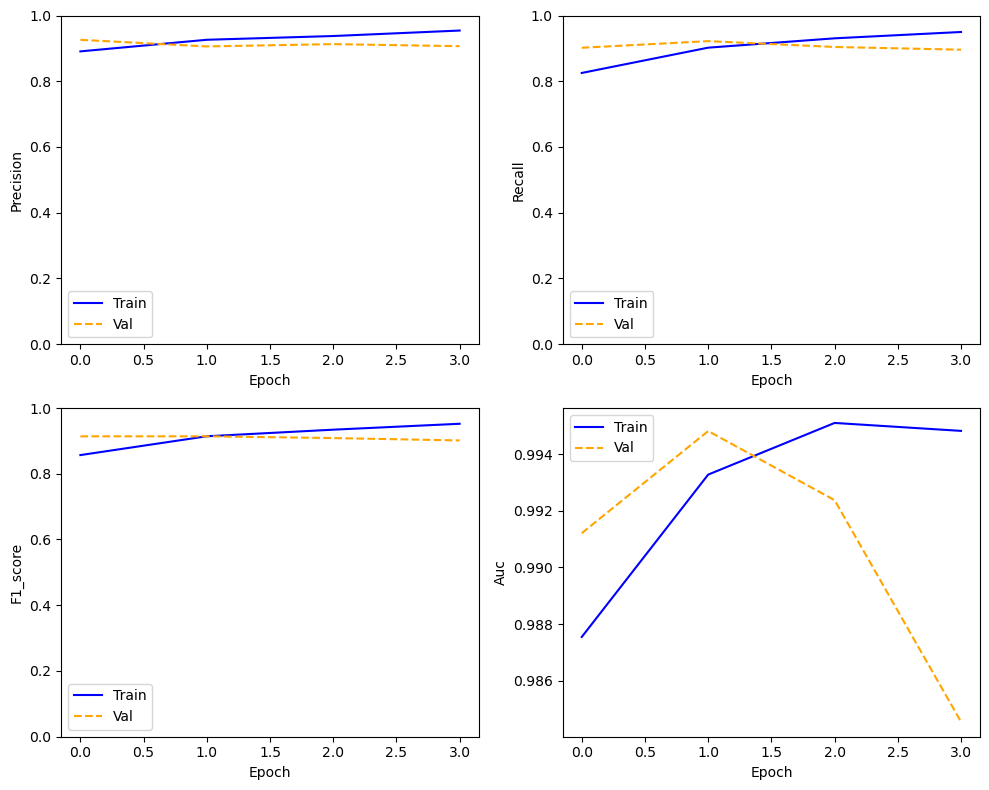

In [69]:
plot_custom_metrics(history3)

499/499 [==============================] - 3s 4ms/step
Classification Report on the test set:
               precision    recall  f1-score   support

        toxic       0.94      1.00      0.97       748
 severe_toxic       0.73      0.76      0.74        80
      obscene       0.89      0.97      0.93       421
       threat       0.00      0.00      0.00        13
       insult       0.87      0.92      0.90       410
identity_hate       0.73      0.46      0.57        71

    micro avg       0.90      0.94      0.91      1743
    macro avg       0.69      0.69      0.68      1743
 weighted avg       0.89      0.94      0.91      1743
  samples avg       0.09      0.09      0.09      1743

Hamming Loss: 0.006350002088816476


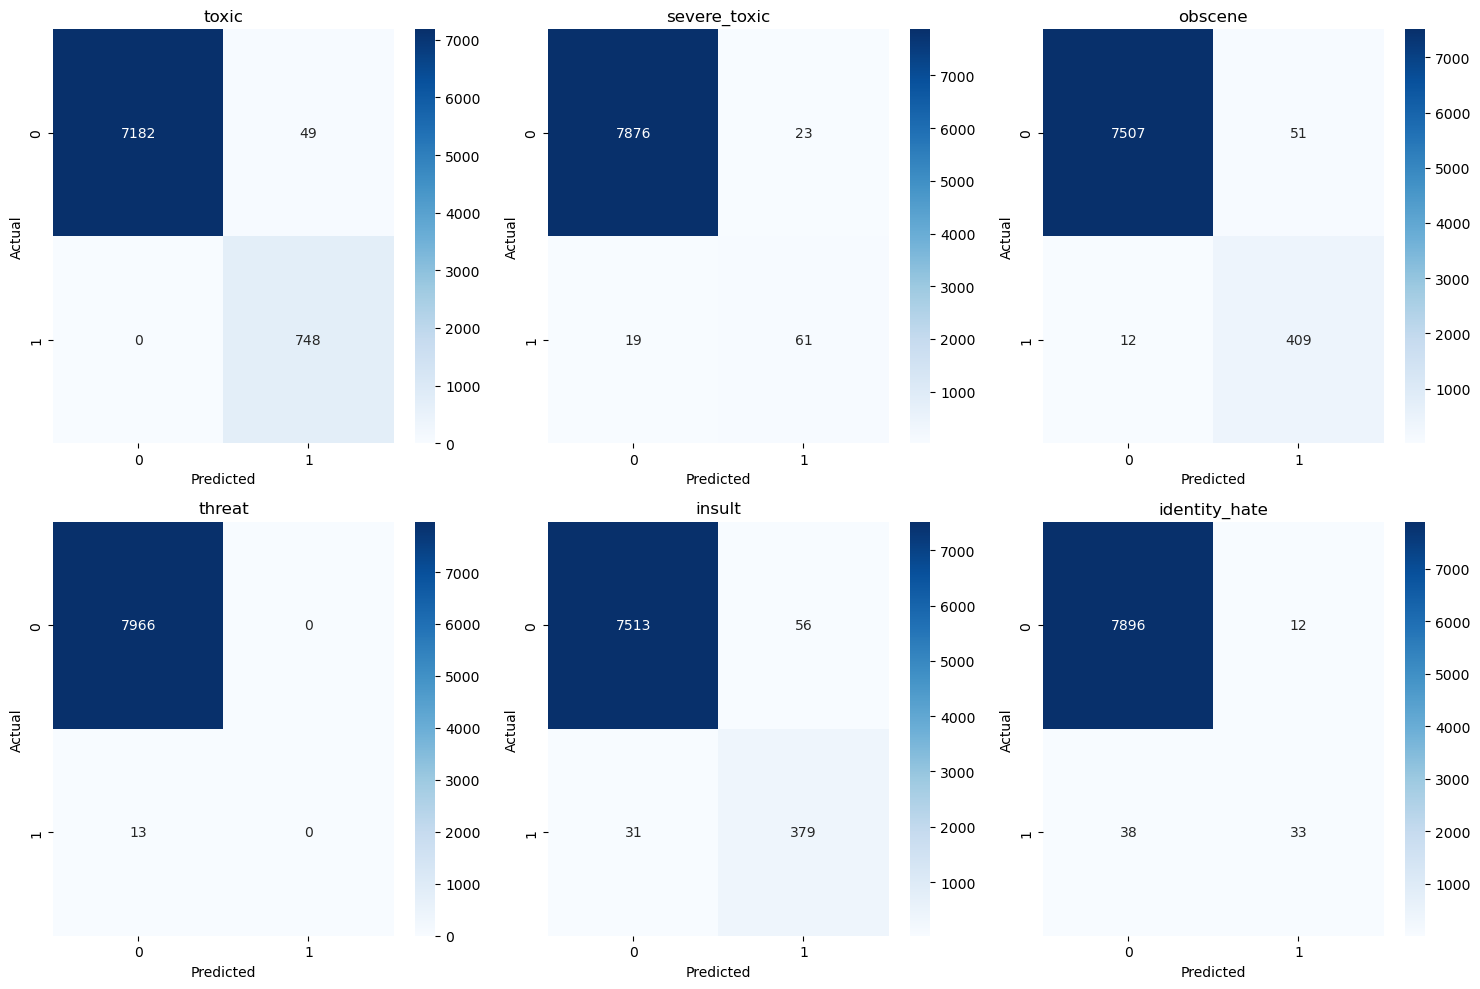

In [70]:
y_pred3 = predict_with_threshold(model3,test_dataset_num)
evaluate_model_performance(y_test,y_pred3)
update_f1_scores(y_test,y_pred3,'rnn3_num', f1_scores_collection)

# Custom loss Text-Numeric input Bi-LSTM

In [71]:
model4 = create_model_with_numerical_input_custom_loss(comment_vectorizer, class_weights)
model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_text (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 text_vectorization (TextVe  (None, 100)                  0         ['input_text[0][0]']          
 ctorization)                                                                                     
                                                                                                  
 embedding_2 (Embedding)     (None, 100, 128)             1280128   ['text_vectorization[3][0]']  
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 48)                   29376     ['embedding_2[0][0]']   

In [72]:
history4 = model4.fit(
    train_dataset_num,
    epochs=40,
    validation_data=val_dataset_num,
    validation_steps=int(0.5 * len(val_dataset_num)),
    callbacks=[early_stopper],
    batch_size=16,
    class_weight=class_weights 
)

Epoch 1/40
9001/9001 [==============================] - 173s 19ms/step - loss: 0.1628 - precision: 0.6610 - recall: 0.9331 - f1_score: 0.7738 - auc: 0.9924 - val_loss: 0.0650 - val_precision: 0.6762 - val_recall: 0.9823 - val_f1_score: 0.8010 - val_auc: 0.9962
Epoch 2/40
9001/9001 [==============================] - 171s 19ms/step - loss: 0.0921 - precision: 0.7606 - recall: 0.9733 - f1_score: 0.8539 - auc: 0.9972 - val_loss: 0.0453 - val_precision: 0.7896 - val_recall: 0.9716 - val_f1_score: 0.8712 - val_auc: 0.9977
Epoch 3/40
9001/9001 [==============================] - 172s 19ms/step - loss: 0.0654 - precision: 0.8131 - recall: 0.9771 - f1_score: 0.8876 - auc: 0.9982 - val_loss: 0.0450 - val_precision: 0.7843 - val_recall: 0.9799 - val_f1_score: 0.8713 - val_auc: 0.9979
Epoch 4/40
9001/9001 [==============================] - 172s 19ms/step - loss: 0.0504 - precision: 0.8474 - recall: 0.9826 - f1_score: 0.9100 - auc: 0.9990 - val_loss: 0.0457 - val_precision: 0.8033 - val_recall: 0.97

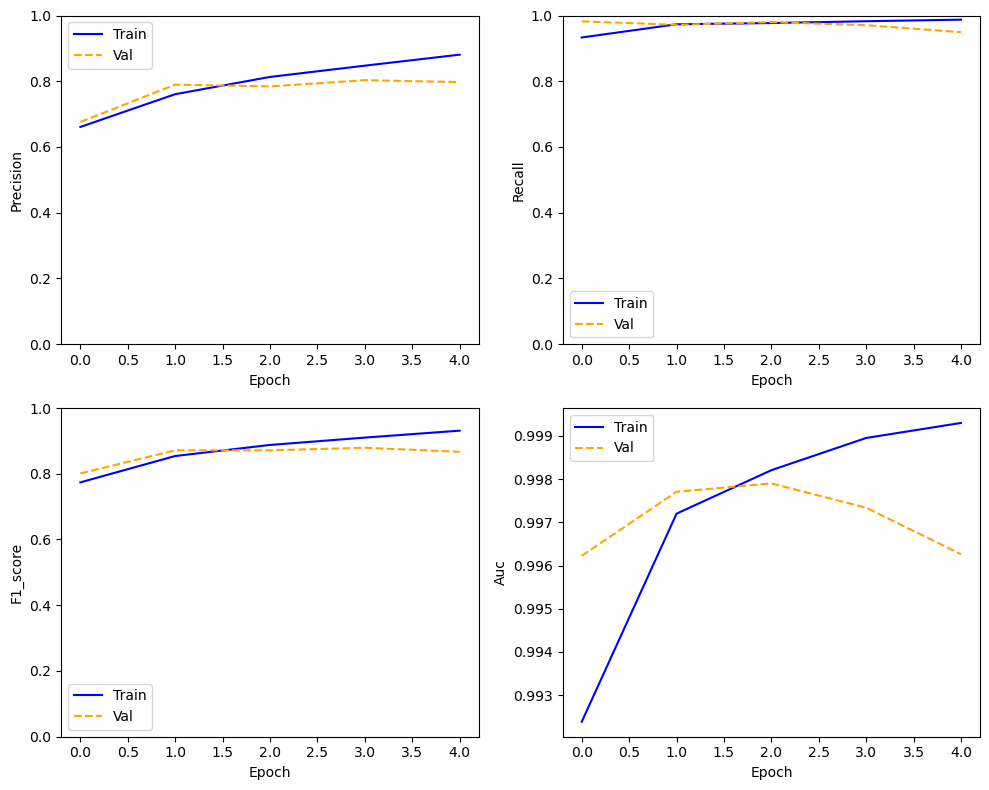

In [73]:
plot_custom_metrics(history4)

499/499 [==============================] - 3s 4ms/step
Classification Report on the test set:
               precision    recall  f1-score   support

        toxic       0.94      1.00      0.97       748
 severe_toxic       0.33      0.99      0.49        80
      obscene       0.84      0.99      0.91       421
       threat       0.11      0.92      0.20        13
       insult       0.87      0.93      0.90       410
identity_hate       0.36      0.90      0.52        71

    micro avg       0.75      0.98      0.85      1743
    macro avg       0.57      0.96      0.66      1743
 weighted avg       0.84      0.98      0.89      1743
  samples avg       0.08      0.10      0.09      1743

Hamming Loss: 0.012491122529974516


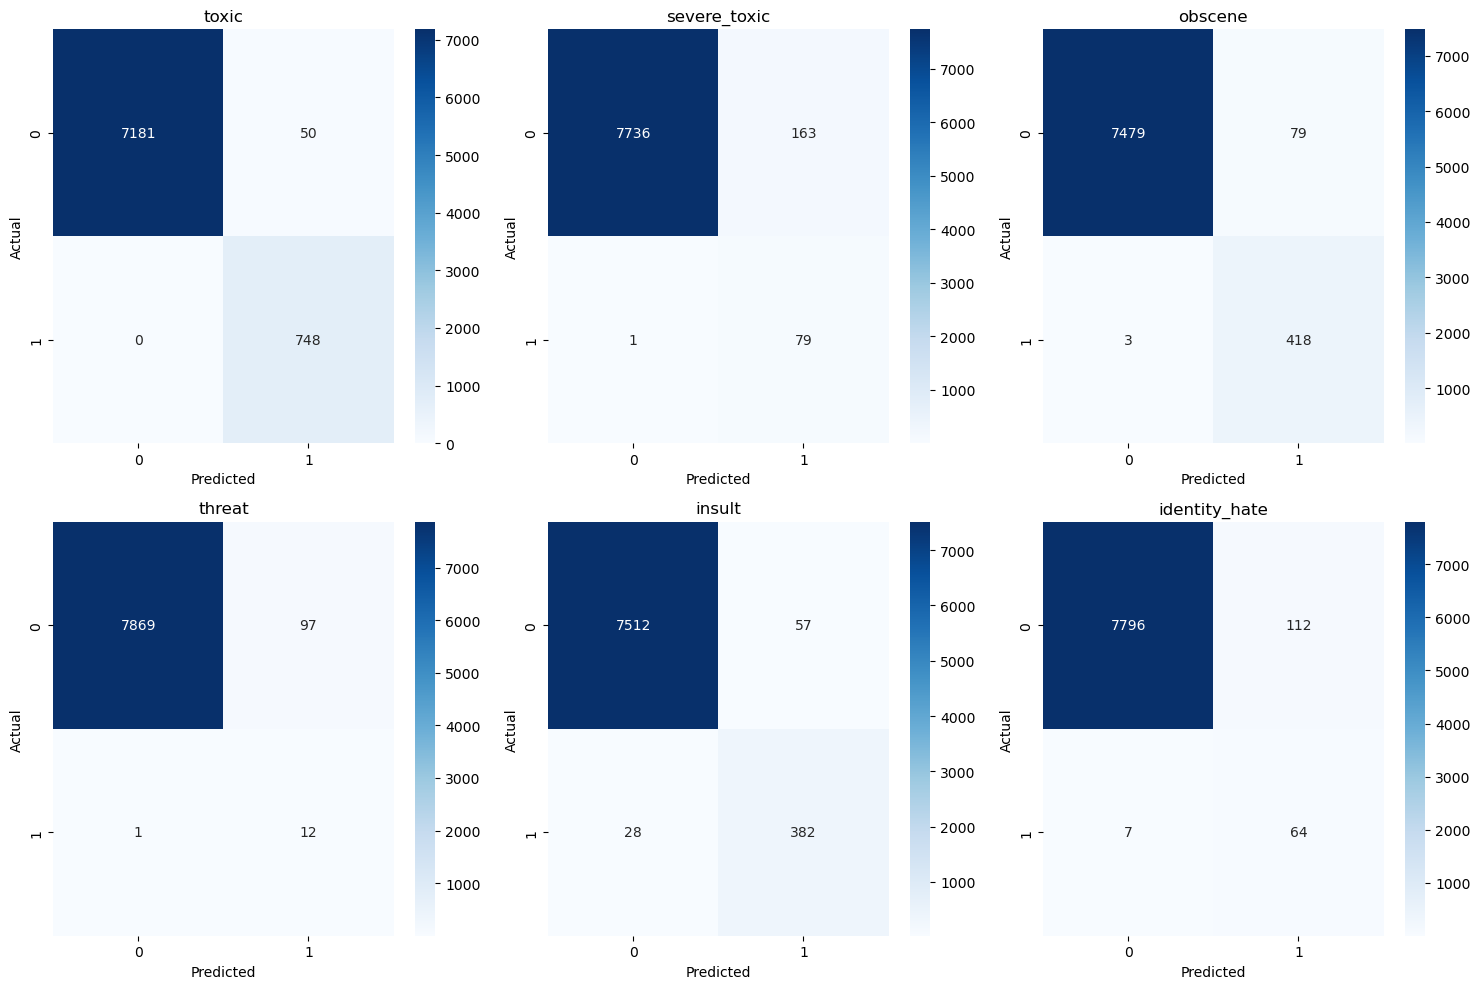

In [74]:
y_pred4 = predict_with_threshold(model4, test_dataset_num)
evaluate_model_performance(y_test, y_pred4)
update_f1_scores(y_test,y_pred4,'rnn4_num_cust_loss', f1_scores_collection)

# Model performance comparison

In [75]:
df_scores = pd.DataFrame(f1_scores_collection).T 
df_scores = df_scores.sort_values(by='weighted_avg', ascending=False)
df_scores

,toxic,severe_toxic,obscene,threat,insult,identity_hate,weighted_avg
LogReg,0.969321,0.753022,0.944132,0.446602,0.915829,0.687764,0.924025
rnn3_num,0.968285,0.743902,0.928490,0.000000,0.897041,0.568966,0.908128
rnn4_num_cust_loss,0.967658,0.490683,0.910675,0.196721,0.899882,0.518219,0.892002
NB,0.954339,0.444605,0.813400,0.104167,0.788798,0.378426,0.826441
rnn1,0.786301,0.344828,0.814650,0.000000,0.730952,0.573643,0.745339
rnn2,0.747204,0.418118,0.791962,0.000000,0.699147,0.189573,0.703318


### Overall insights:

The results underline the challenge of predicting certain types of toxicity, especially 'threat' and 'identity_hate'. Logistic Regression maintains a strong baseline performance, but RNN models with numerical input (rnn3_num) and those employing custom loss functions (rnn4_num_cust_loss) show promise in addressing specific weaknesses, particularly for less frequent or more nuanced labels. The improvement in the 'threat' category for rnn4_num_cust_loss, in particular, highlights the potential of custom loss functions to mitigate issues related to class imbalance.

# Display results

In [76]:
label_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
index = 6  # The index of the comment to classify
text = [data.iloc[index]['cleaned_comment_text']]  #this is a list containing a single string
sum_injurious = np.array([[data.iloc[index]['sum_injurious']]]).astype(np.float32)  # Shape (1, 1)
# Get the predicted labels
predicted_labels = predict_single_example(model3, text, sum_injurious)
# Retrieve the true labels from the dataframe
true_label_values = data.iloc[index][label_names].values
# Associate true label values with their names
true_labels_named = [label_names[i] for i, value in enumerate(true_label_values) if value == 1]
# Print the comment, true labels with names, and predicted labels
print("Comment:", text[0])
print("The true labels are:", true_labels_named)
print("The predicted labels are:", predicted_labels)

1/1 [==============================] - 1s 512ms/step
Comment: cocksucker piss around work
The true labels are: ['toxic', 'severe_toxic', 'obscene', 'insult']
The predicted labels are: ['toxic', 'severe_toxic', 'obscene', 'insult']
